In [1]:
import pandas as pd
csv_1999=pd.read_csv("https://raw.githubusercontent.com/kohjiaxuan/Predicting-HDB-Price-with-Machine-Learning/master/resale-flat-prices-based-on-approval-date-1990-1999.csv")
csv_2000=pd.read_csv("https://raw.githubusercontent.com/kohjiaxuan/Predicting-HDB-Price-with-Machine-Learning/master/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv")
csv_2014=pd.read_csv("https://raw.githubusercontent.com/NagammaiSP/Singapore_Resale_Flat-prices_prediction/main/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
csv_2016=pd.read_csv("https://raw.githubusercontent.com/NagammaiSP/Singapore_Resale_Flat-prices_prediction/main/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
csv_2017=pd.read_csv("https://raw.githubusercontent.com/NagammaiSP/Singapore_Resale_Flat-prices_prediction/main/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [2]:
a=csv_1999["flat_model"].str.title()
csv_1999["flat_model"]=a

In [3]:
csv_1999["resale_price"]=csv_1999["resale_price"].astype("float16")

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


In [4]:
import pandas as pd
import re

def convert_to_decimal_years_from_string(duration_str):
    # Use regex to find all numbers in the string
    numbers = re.findall(r'\d+', duration_str)
    if len(numbers) != 2:
        years = int(numbers[0])
        decimal_year=years
    else:
        years = int(numbers[0])
        months = int(numbers[1])
        # Convert months to fractional year
        fractional_year = months / 12
        # Add the fractional year to the number of years
        decimal_year = years + fractional_year
        # Round to 2 decimal places
    return round(decimal_year, 2)
# Convert the 'Duration' column to decimal years
csv_2017['remaining_lease'] = csv_2017['remaining_lease'].apply(convert_to_decimal_years_from_string)
csv_2017

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61.33,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60.58,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62.42,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62.08,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62.42,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
178239,2024-03,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,62.67,855000.0
178240,2024-04,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,62.83,900000.0
178241,2024-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,62.83,805000.0
178242,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,62.92,998000.0


In [5]:
dfs = [csv_1999,csv_2000,csv_2014,csv_2016,csv_2017]

# Concatenate DataFrames
df = pd.concat(dfs, ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
924446,2024-03,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,855000.0,62.67
924447,2024-04,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,900000.0,62.83
924448,2024-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0,62.83
924449,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62.92


In [6]:
df[['start','end']] = df['storey_range'].str.split('TO', expand=True)

In [7]:
df.drop(columns=["storey_range","block","street_name"],inplace=True)

In [8]:
df["remaining_lease"].fillna(df["remaining_lease"].mean(),inplace=True)

In [11]:
#replacing MULTI-GENERATION with MULTI GENERATION
df.loc[df['flat_type'] == 'MULTI-GENERATION', 'flat_type'] = 'MULTI GENERATION'
df.loc[df['flat_model'] == '2-Room', 'flat_model'] = '2-room'
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [12]:
df["start"]=df["start"].astype("float16")
df["end"]=df["end"].astype("float16")

In [13]:
# Convert the 'month' column to a datetime format
df['month'] = pd.to_datetime(df['month'])
# Extract the year and month into separate columns
df['year'] = df['month'].dt.year
df['month_of_year'] = df['month'].dt.month
df

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,start,end,year,month_of_year
0,1990-01-01,ANG MO KIO,1 ROOM,31.0,Improved,1977,9000.0,74.510129,10.0,12.0,1990,1
1,1990-01-01,ANG MO KIO,1 ROOM,31.0,Improved,1977,6000.0,74.510129,4.0,6.0,1990,1
2,1990-01-01,ANG MO KIO,1 ROOM,31.0,Improved,1977,8000.0,74.510129,10.0,12.0,1990,1
3,1990-01-01,ANG MO KIO,1 ROOM,31.0,Improved,1977,6000.0,74.510129,7.0,9.0,1990,1
4,1990-01-01,ANG MO KIO,3 ROOM,73.0,New Generation,1976,47200.0,74.510129,4.0,6.0,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...
924446,2024-03-01,YISHUN,EXECUTIVE,142.0,Apartment,1987,855000.0,62.670000,7.0,9.0,2024,3
924447,2024-04-01,YISHUN,EXECUTIVE,146.0,Maisonette,1988,900000.0,62.830000,4.0,6.0,2024,4
924448,2024-04-01,YISHUN,EXECUTIVE,142.0,Apartment,1988,805000.0,62.830000,4.0,6.0,2024,4
924449,2024-02-01,YISHUN,MULTI GENERATION,164.0,Multi Generation,1987,998000.0,62.920000,4.0,6.0,2024,2


In [14]:
#  dropping the existing features
df.drop(columns=['month'],inplace = True)

In [15]:
# checking the outliars using boxplot distribution plot

def plot(house_new_data,column):
    plt.figure(figsize =(15,6))
    plt.subplot(1,3,1)
    sns.boxplot(data = house_new_data ,x = column)
    plt.title(f'box plot for {column}')
    plt.subplot(1,3,2)
    sns.histplot(data = house_new_data ,x = column,kde = True ,bins = 40)
    plt.title(f'distribution  plot for {column}')
    plt.show()

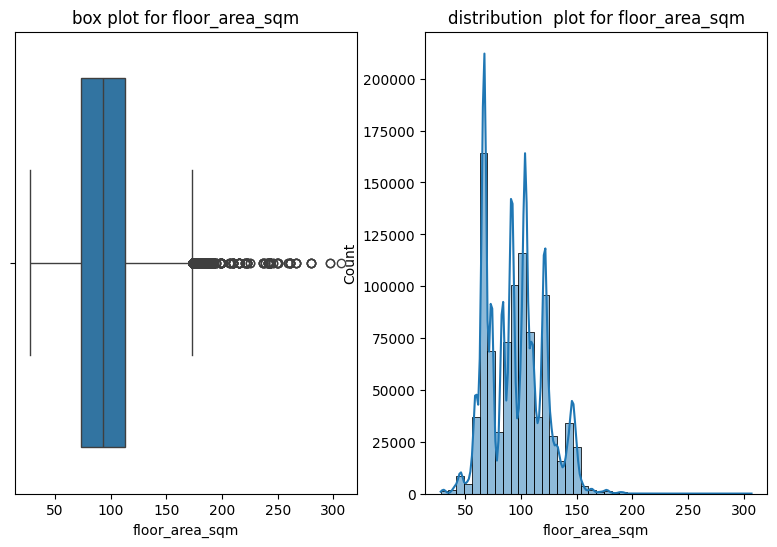

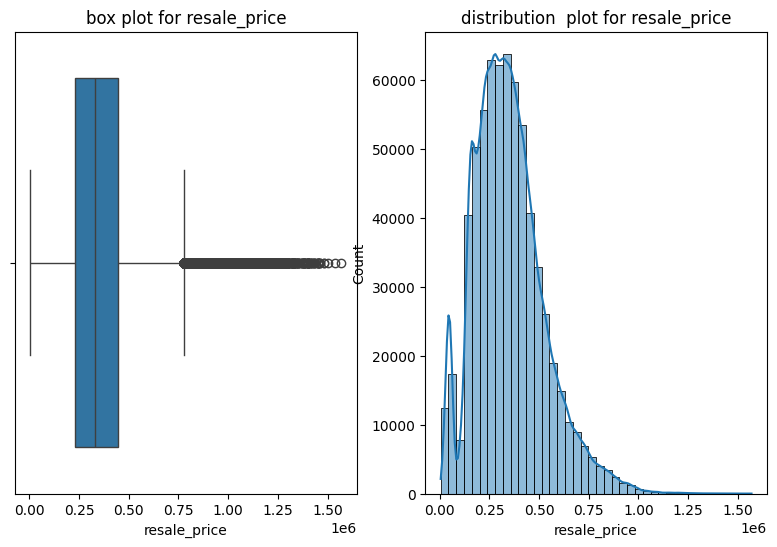

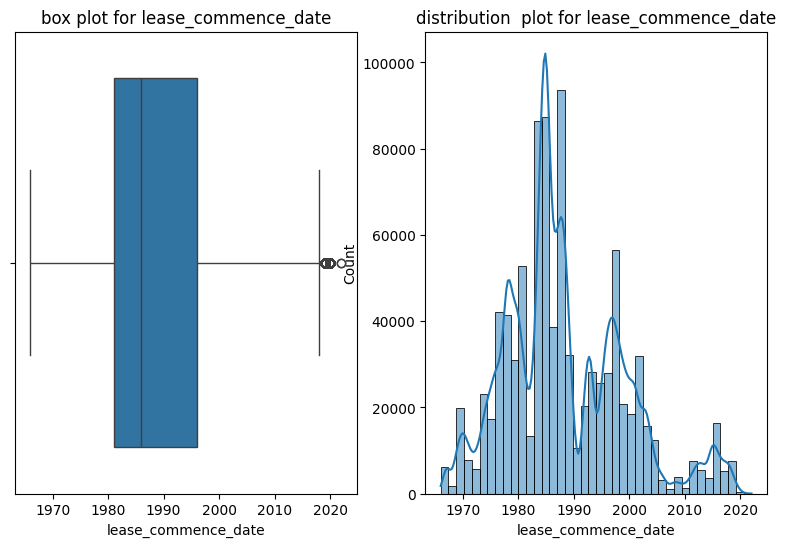

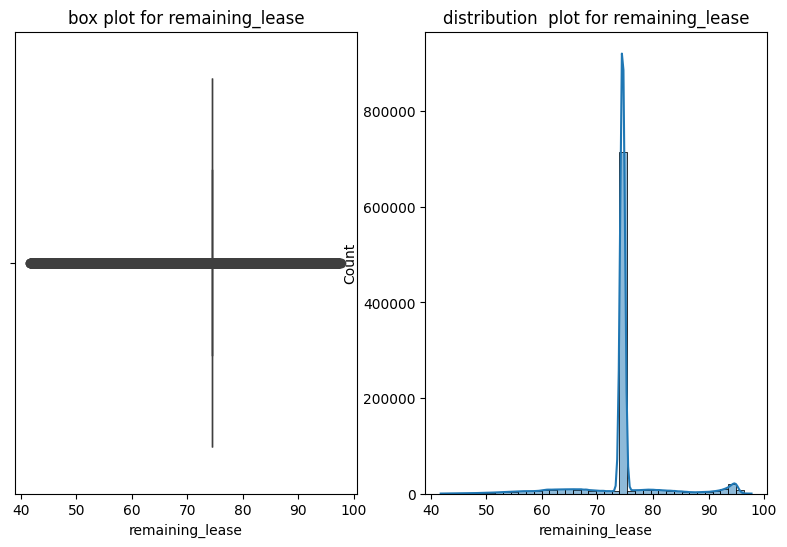

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in ['floor_area_sqm','resale_price','lease_commence_date','remaining_lease']:
    plot(df ,i)

In [17]:
# 'floor_area_sqm','resale_price' this two feature are skewd in data handling log method
import numpy as np
df['floor_area_sqm'] = np.log(df['floor_area_sqm'])
df['resale_price'] = np.log(df['resale_price'])
df

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,start,end,year,month_of_year
0,ANG MO KIO,1 ROOM,3.433987,Improved,1977,9.104980,74.510129,10.0,12.0,1990,1
1,ANG MO KIO,1 ROOM,3.433987,Improved,1977,8.699515,74.510129,4.0,6.0,1990,1
2,ANG MO KIO,1 ROOM,3.433987,Improved,1977,8.987197,74.510129,10.0,12.0,1990,1
3,ANG MO KIO,1 ROOM,3.433987,Improved,1977,8.699515,74.510129,7.0,9.0,1990,1
4,ANG MO KIO,3 ROOM,4.290459,New Generation,1976,10.762149,74.510129,4.0,6.0,1990,1
...,...,...,...,...,...,...,...,...,...,...,...
924446,YISHUN,EXECUTIVE,4.955827,Apartment,1987,13.658857,62.670000,7.0,9.0,2024,3
924447,YISHUN,EXECUTIVE,4.983607,Maisonette,1988,13.710150,62.830000,4.0,6.0,2024,4
924448,YISHUN,EXECUTIVE,4.955827,Apartment,1988,13.598598,62.830000,4.0,6.0,2024,4
924449,YISHUN,MULTI GENERATION,5.099866,Multi Generation,1987,13.813509,62.920000,4.0,6.0,2024,2


In [18]:
#using the IQR & Clips  method removing the outliars :
# formula IQR = Q3_Q1
def outlier(house_new_data ,column):
    IQR = house_new_data[column].quantile(0.75)-house_new_data[column].quantile(0.25)
    upper_value = house_new_data[column].quantile(0.75)+1.5*IQR
    lower_value = house_new_data[column].quantile(0.25)-1.5*IQR
    house_new_data[column] = house_new_data[column].clip(upper_value,lower_value)
outlier(df, 'floor_area_sqm')
outlier(df, 'resale_price')

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [19]:
df1=df[df["resale_price"]!=df["resale_price"].max()]

In [26]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
# from sklearn.svm import SVR
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Load the data
# data = df1

# # Handle missing values
# # Check for missing values
# print(data.isnull().sum())

# # Define the features and target
# X = data.drop('resale_price', axis=1)
# y = data['resale_price']

# # Preprocessing pipeline for categorical features
# categorical_features = ['town', 'flat_type', 'block', 'street_name', 'flat_model']
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Preprocessing pipeline for numerical features
# numerical_features = ['floor_area_sqm', 'lease_commence_date', 'remaining_lease', 'start', 'end', 'year', 'month_of_year']
# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median'))
# ])

# # Combine preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # List of models to try
# models = {
#     'Linear Regression': LinearRegression(),
#     'Ridge Regression': Ridge(),
#     'Lasso Regression': Lasso(),
#     'Elastic Net': ElasticNet(),
#     'Decision Tree': DecisionTreeRegressor(),
#     'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
#     'Gradient Boosting': GradientBoostingRegressor(),
#     'XGBoost': XGBRegressor(),
#     'LightGBM': LGBMRegressor(),
#     'CatBoost': CatBoostRegressor(verbose=0),
#     'SVR': SVR()
# }

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Iterate through the models and evaluate each
# for name, model in models.items():
#     print(f'Training and evaluating {name}...')
#     pipeline = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('regressor', model)
#     ])

#     # Train the model
#     pipeline.fit(X_train, y_train)

#     # Make predictions
#     y_pred = pipeline.predict(X_test)

#     # Evaluate the model
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = pipeline.score(X_test, y_test)

#     print(f'{name} - MAE: {mae}, RMSE: {rmse}, R²: {r2}\n')


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data
data = df1

# Handle missing values
# Check for missing values
print(data.isnull().sum())

# Define the features and target
X = data.drop('resale_price', axis=1)
y = data['resale_price']

# Preprocessing pipeline for categorical features
categorical_features = ['town', 'flat_type','flat_model']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing pipeline for numerical features
numerical_features = ['floor_area_sqm', 'lease_commence_date', 'remaining_lease', 'start', 'end', 'year', 'month_of_year']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


print(f'Training and evaluating XGBRegressor()...')
XGBRegressor_model = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', XGBRegressor())
   ])

# Train the model
XGBRegressor_model.fit(X_train, y_train)

# Make predictions
y_pred = XGBRegressor_model.predict(X_test)

# Evaluate the model
r2 = XGBRegressor_model.score(X_test, y_test)
print("r2",r2)

town                   0
flat_type              0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
start                  0
end                    0
year                   0
month_of_year          0
dtype: int64
Training and evaluating XGBRegressor()...
0.982740677947423


In [27]:
import pickle
with open('XGBRegressor_model.pkl', 'wb') as f:
    pickle.dump(XGBRegressor_model, f)